# Uniform Linear Array

In [2]:
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

The number of antenna elements building Uniform Linear Array:

In [4]:
nAnt = 16

In [5]:
nAngles = 360
minAngle = -179
maxAngle = 180

So, angles are calculated as follows:

In [29]:
angles = np.linspace(minAngle, maxAngle, nAngles)
angles = np.array([angles])

In [6]:
amp = np.ones((1, nAnt))

Now, we can write function to calculate radiation pattern of an atenna linear arrray

In [30]:
def pattern_calc(amp, nPoints):
    y = abs(np.fft.fft(amp, nPoints))
    y = np.fft.fftshift(y)
    y = 20*np.log10(y)
    return y

A function, which plots radiation pattern will be very handy right now and later on as well.

In [31]:
def pattern_plot(x, y):
    fig = plt.subplot(1,1,1)
    axes = plt.gca()
    axes.plot(x.T,y.T)
    axes.set_title("Radiation pattern of Uniform Linear Array")
    axes.set_xlabel("angles [deg]")
    axes.set_ylabel("amplitude [dB]")
    axes.set_xlim([np.min(x), np.max(x)])
    axes.set_ylim([-30, np.max(y)+5])
    plt.grid()

Finally, a pattern can be calclulated and ploted using previously defined pattern_calc and pattern_plot functions.

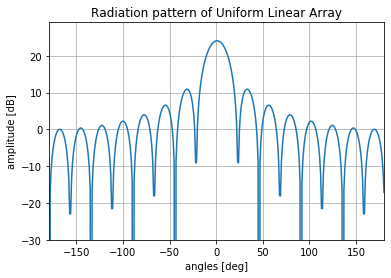

In [32]:
y_lin = pattern_calc(amp, nAngles)
pattern_plot(x, y_lin)

In the next step let's improve slide lobe levels by applying tapering e.g. Chebyschev

In [15]:
from scipy import signal
window = signal.chebwin(nAnt, at=20)

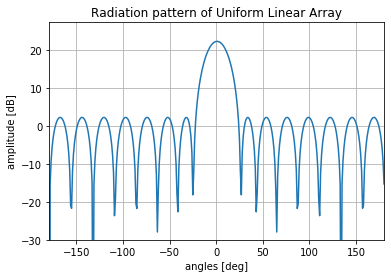

In [33]:
y_lin = pattern_calc(window, nAngles)
pattern_plot(x, y_lin)